<a href="https://colab.research.google.com/github/anafer25/Sentiment-Analysis-on-Movie-Reviews/blob/main/Sentiment_Analysis_on_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5462 - loss: 0.6915 - val_accuracy: 0.6590 - val_loss: 0.6814
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6646 - loss: 0.6763 - val_accuracy: 0.7550 - val_loss: 0.6531
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7536 - loss: 0.6438 - val_accuracy: 0.7550 - val_loss: 0.6037
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7745 - loss: 0.5877 - val_accuracy: 0.7876 - val_loss: 0.5356
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8156 - loss: 0.5140 - val_accuracy: 0.8254 - val_loss: 0.4711
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8374 - loss: 0.4512 - val_accuracy: 0.8296 - val_loss: 0.4268
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8517 - loss: 0.4011 - val_accuracy: 0.8506 - val_loss: 0.3868
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8692 - loss: 0.3602 - val_accuracy: 0.8558 - v

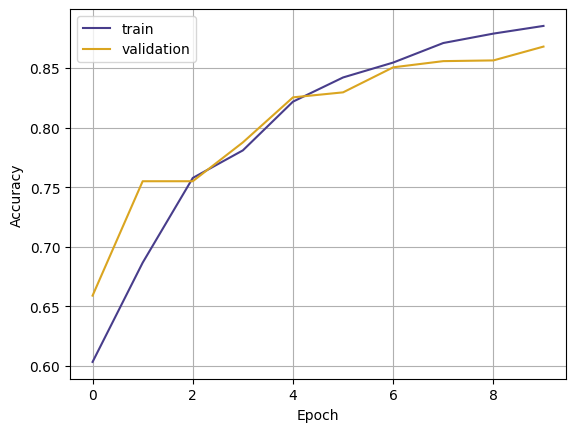

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# load dataset: IMBD movie reviews
# 1 = positive, 0 = negative
( xTrain, yTrain ), ( xTest, yTest ) = tf.keras.datasets.imdb.load_data(num_words=10000)

# pad sequences
xTrain = tf.keras.preprocessing.sequence.pad_sequences(xTrain, maxlen=256)
xTest = tf.keras.preprocessing.sequence.pad_sequences(xTest, maxlen=256)

# build model: turn word IDs into vectors and summarize
model = models.Sequential([
    layers.Input( shape=(256,) ),
    layers.Embedding( input_dim=10000, output_dim=16 ),
    layers.GlobalAveragePooling1D( ),
    layers.Dense( 16, activation='relu' ),
    layers.Dense( 1, activation='sigmoid' )
])

# compile
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# train
history = model.fit(
    xTrain,
    yTrain,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

# evaluate
test_loss, test_acc = model.evaluate( xTest, yTest )
print( "Test accuracy:", test_acc )

# plot accuracy
plt.plot( history.history['accuracy'], label='train', color='darkslateblue' )
plt.plot( history.history['val_accuracy'], label='validation', color='goldenrod' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.grid(True)
plt.legend( )
plt.show( )

